# Inferential statistics II - Bootstrapping

## Introduction

In the previous frequentist mini-projects, you did frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th-Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold for the particular case you're working on, and what you want to do has a known theoretical distribution (for example the mean of a sampling distribution that we looked at in the previous mini-project.)

In this mini-project, you'll use the same medical charge data you used in the frequentist inference mini-project, but this time you'll make inferences about the population using bootstrapping (ie. simulating repeated re-runs of an experiment.) If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

While these exercises do not strictly depend on these concepts, we encourage you to complete the previous mini-projects before starting this one so that you can approach this assignment with a good understanding of frequentist concepts like:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete mini-project, it's important that you first complete the bootstrap resources listed in this subunit, as they contain valuable information about how to calculate bootstrap replicates of summary statistics. Having an basic understanding of what confidence intervals and p-values are will also be helpful (we touch on them in this mini-project, but please speak to your mentor or conduct individual research if you'd like to learn more.) 

In [43]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

## Medical charge data set

In [44]:
med_charges = pd.read_csv('data/insurance2.csv')

In [45]:
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [46]:
np.random.seed(47)
N_rep = 10000

bs_replicates=np.empty(N_rep) #intialize array to save replicate data from BootStrap samples

for i in range(N_rep):
    bs_sample =np.random.choice(med_charges.charges,len(med_charges.charges)) #Bootstraping sample data from original sample with replacement
    bs_replicates[i]=np.mean(bs_sample)


#plt.hist(bs_replicates, bins=30, density=True)
#plt.xlabel("BS Mean Replicates")

bs_confidence=np.percentile(bs_replicates, [5])
bs_confidence

array([12724.4679217])

If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [47]:
insurance=med_charges[med_charges.insuranceclaim==1]
non_insurance=med_charges[med_charges.insuranceclaim==0]
#insurance.charges

In [48]:
def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_samples=np.random.choice(data, len(data))
        bs_replicates[i]=func(bs_samples)
    return bs_replicates


In [49]:
#Null Hypothesis H0= insurance and non-insurance data have same std (and by that virtue same variance). 
#That is if we take difference of difference in stds of both data sets, we should get a 0
#
#Alternative Hypothesis Ha= insurance and non-insurance data have different variance

In [50]:
#difference in std deviation of the insurance and non_insurance data as it is 
diff_std_sample=np.std(insurance.charges) - np.std(non_insurance.charges)
diff_std_sample

7596.256408655178

95% confidence interval is:  [6684.31447766 8500.74902263]


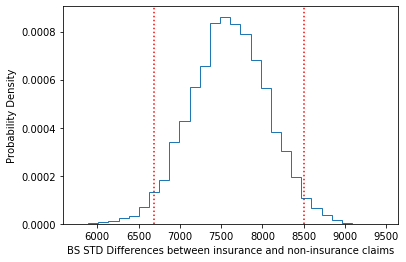

In [51]:
np.random.seed(47)
N_rep = 10000

ins_bs_std_reps=draw_bs_reps(insurance.charges,np.std,10000)
non_ins_bs_std_reps=draw_bs_reps(non_insurance.charges, np.std,10000)

diff_std_bs_reps=ins_bs_std_reps - non_ins_bs_std_reps

conf_std_bs_reps=np.percentile(diff_std_bs_reps,[2.5,97.5])

_=plt.hist(diff_std_bs_reps,bins=30,density=True, histtype='step')
_=plt.xlabel('BS STD Differences between insurance and non-insurance claims')
_=plt.ylabel('Probability Density')
plt.axvline(conf_std_bs_reps[0], color='r', linestyle = ':')
plt.axvline(conf_std_bs_reps[1], color='r', linestyle = ':')

print('95% confidence interval is: ', conf_std_bs_reps)



#Commentary: 
#The difference of standard deviation between replicates of insurance and non-insurance data shows that the difference of the std is within 6684 and 8500 95% of the time. 
#Clearly it is not equal to 0. Therefore null hypothesis can be rejected. 

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type I error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this, this time using the bootstrap approach.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

#H0: There is no difference in the insurance and non-insurance charges
#Ha: There is a differnce in the insurance and non-insurance charges
#$\alpha = 0.05$


In [52]:
#We will proceed with assumption that both data sets have same mean. 
#Therefore we need to shift datasets such that they have equal means

combined_mean=np.mean(np.concatenate((insurance.charges, non_insurance.charges)))


insurance_shift=np.array(insurance.charges - np.mean(insurance.charges) + combined_mean)

non_insurance_shift = np.array(non_insurance.charges - np.mean(non_insurance.charges) + combined_mean)



In [53]:
#Take 10,000 replicates (mean) from the shifted data

ins_shift_reps=draw_bs_reps(insurance_shift,np.mean,size=10000)
non_ins_shift_reps=draw_bs_reps(non_insurance_shift,np.mean,size=10000)

diff_shift=ins_shift_reps - non_ins_shift_reps
diff_shift

#Difference in observed sample data for insurance and non-insurance
diff_sample = np.mean(insurance.charges) - np.mean(non_insurance.charges)
diff_sample



7602.506384231368

In [58]:
#finding p_value
#p = np.sum(bootstrap_data >= observed_sample_data)/len(bootstarp_data)

p=np.sum(diff_shift >= diff_sample)/len(diff_shift)
print("p= " + str(p))



value of p: 0.0


__A__: Assuming that there is no difference between insurance and non_insurance charges i.e with null hypotheis being true and finding p value of 0 under null distribution(diff_shift), it can be concluded that it not likely(p < $\alpha = 0.05$) that H0 is true. Therefore we reject H0. 

__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ we plot two lines because the mean could be -ve or +ve depending upon which value goes first in subtraction. 


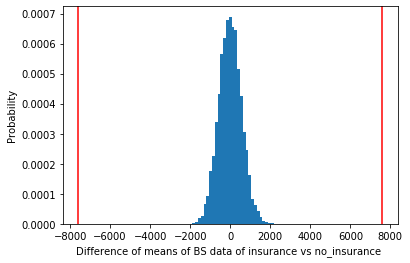

In [68]:
_=plt.hist(diff_shift, bins=30, density=True)
_=plt.xlabel('Difference of means of BS data of insurance vs no_insurance ')
_=plt.ylabel('Probability')
_=plt.axvline(diff_sample, color='r')
_=plt.axvline(-diff_sample, color='r')

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__p_value from last assignment is 1.1105103216309438e-37 which is practically zero. Since probabilty of these two data sets having same mean is almost nill, taking further BS replicates (>10000) will do no good. 

__Q:__ Consider the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ Definitly use the t-test that assumes different variances and perfrom Welch's test 

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real-world consequence of rejecting the null hypothesis?

__A:__ H0 = Test statistic(mean click through rate) is same with  Algorithm A and B
       Ha= Test statistic (mean click through rate) is not same with Algorithms A and B

I would assume that that mean click rate is same (i.e. mean difference between the two data is zero) and move forward with permutation sampling. Find the mean difference between the two observed datas and calculating the probability of finding the mean difference as extreme as the observed mean difference. When a null hypothesis assumes two quantities are identical, permutation testing is often prefered to test the H0.

By getting p-value I can specify what % of mean difference are as extreme as observed mean differences and if that percentage is high (higher than $/alpha) rejet the H0 else accept it. 
One sided test will be suffienct in this case

Real world consequnces in this case will be if we reject H0 and it is actually true (Type 1 error). In other words if H0 is rejected it means that the ad recommender team will assume that there is actually a difference in clicks between algo A and B. They will move forward with the plans and at the end it might result in waste of resources and time put into effot. 

       

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have:
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.